# Results Visualization 
This file contains visualization of results obtained by running models_training.ipynb <br>
The produced figures show the same information as provided in the assignment sheet. 

In [1]:

from experiments.evaluation_result_container import EvaluationResultContainer
from visualization_utils import mk_bar_plt, mk_bar_plt
from experiments.evaluation_statistics import aggregate_by_exp_type
from experiments.metric import MetricTemplate,Flags, Metric
import matplotlib.pyplot as plt
from experiments.experiment_type import ExperimentType
from visualization_utils import plot_multi_step, mk_e1_fig, mk_e2_fig_1, mk_e2_fig_2, mk_e2_fig_3
import numpy as np

(4, 64)


In [2]:
from experiments.utils import merge_results_by_reps
#merge_results_by_reps(sdir="saved_data\eval_results\E_1",tdir="saved_data\eval_results\E_1")

In [5]:
from sys import flags
from matplotlib.pyplot import flag


E1_ht = EvaluationResultContainer.from_json("saved_data\eval_results\E_1\E_1_1_half_teacher_10k_reps_1+2+3.json")
E1_ht_avrg:EvaluationResultContainer = np.mean(E1_ht, axis=0)

E1_t = EvaluationResultContainer.from_json("saved_data\eval_results\E_1\E_1_1_teacher_10k_reps_1+2+3.json")
E1_t_avrg:EvaluationResultContainer = np.mean(E1_t, axis=0)


temp = MetricTemplate(flags=[Flags.DistrFlags.OutLen, Flags.MetricFlags.ACC])

diff = E1_ht_avrg - E1_t_avrg

d = diff.get_data(temp)

[print(m) for m in d]





(SUB,DIV,ADD,Z)E_1_1Y_teacher_10k_rep_1_epoch_6[Z,Y] E_1_1 ACC  TL  OutLen  ORACLE  : 
0: 0.0
1: 0.0
2: 0.0
3: -0.0056980053583781665
4: -0.00465548038482666
5: -0.007876237233479855
6: -0.008076330025990841
7: -0.010307133197784424
8: -0.015389084815979004
9: -0.007549842198689816
10: -0.007892270882924435
11: -0.009615401426951053
12: -0.007591426372528076
13: -0.009021838506062863
14: -0.01167728503545129
15: 0.00033926963806152344
16: -0.014814794063568115
17: -0.010299066702524895
18: -0.009780903657277462
19: 0.009891748428344727
20: -0.015993277231852177
21: -0.049062033494313595
22: -0.002818882465362549
23: 0.0
24: -0.010172168413798088
25: -0.0015686353047689172
26: -0.006143152713775635
27: -0.010039329528808594
28: -0.00392315785090136
29: 0.0
30: -0.005765179793039921
31: 0.0
32: -0.007440487543741825
33: -0.0006060600280761719
34: 0.0
35: 0.0
36: -0.05972220500310266
37: 0.0
38: 0.0
39: 0.0
40: -0.003549377123514774
41: 0.0
42: 0.0
43: 0.0
44: 0.0
45: 0.0
46: 0.0
47: 0.0


[None, None, None, None]

# Experiment 1 & 2

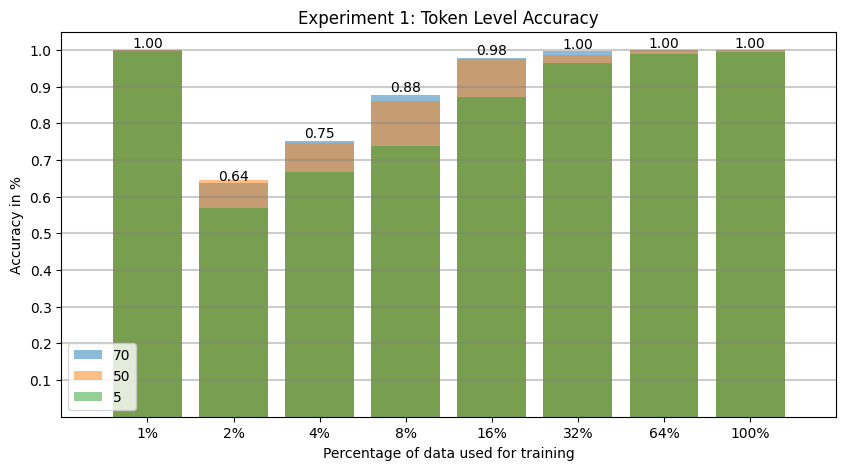

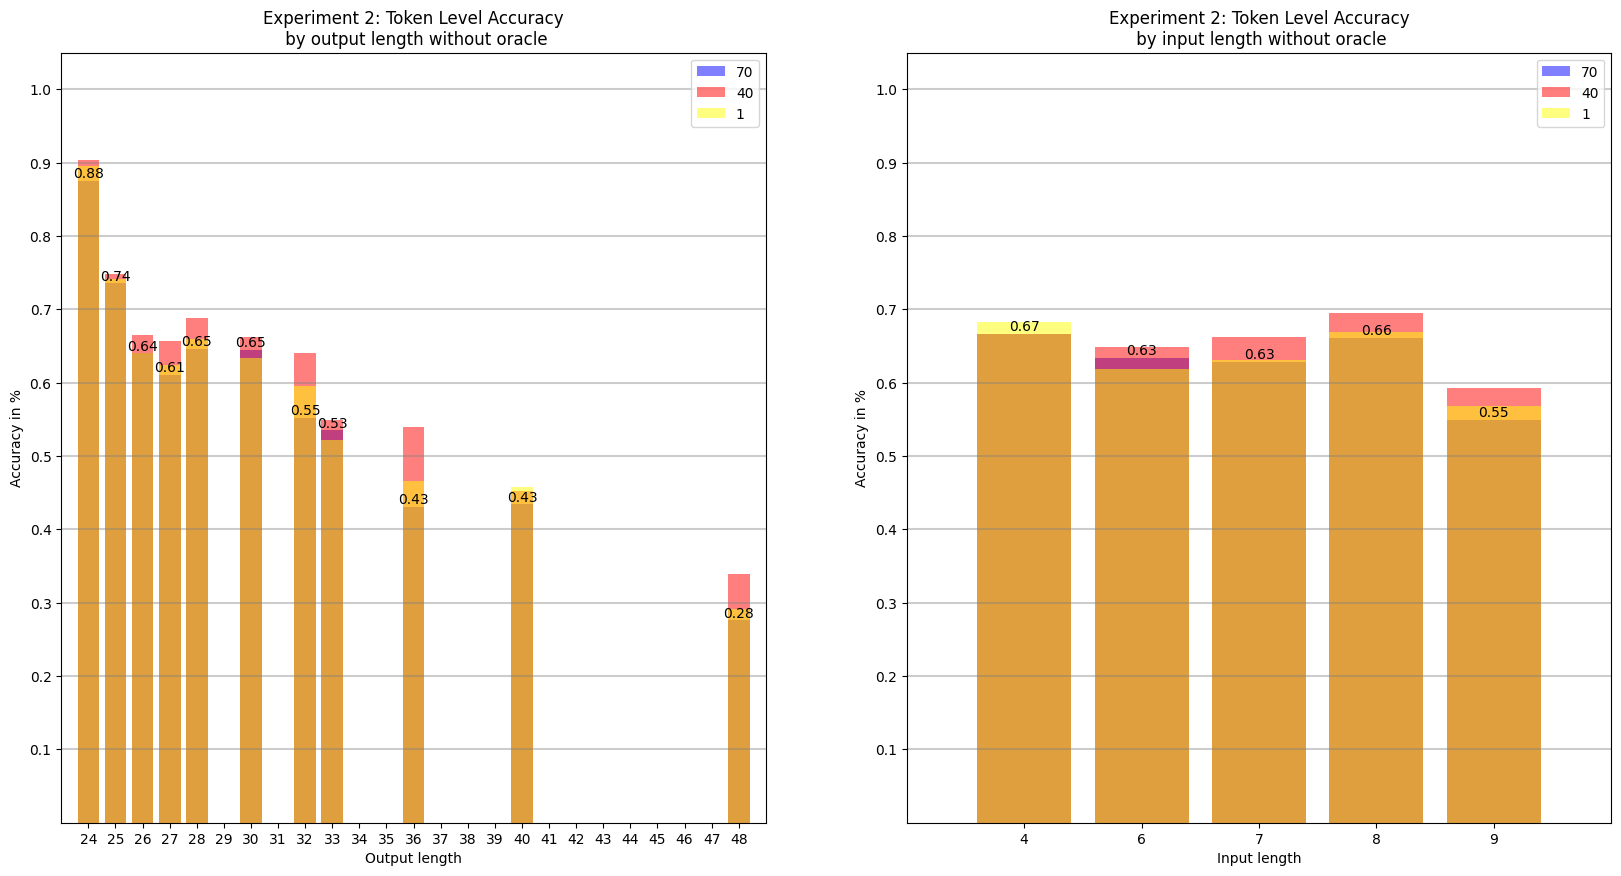

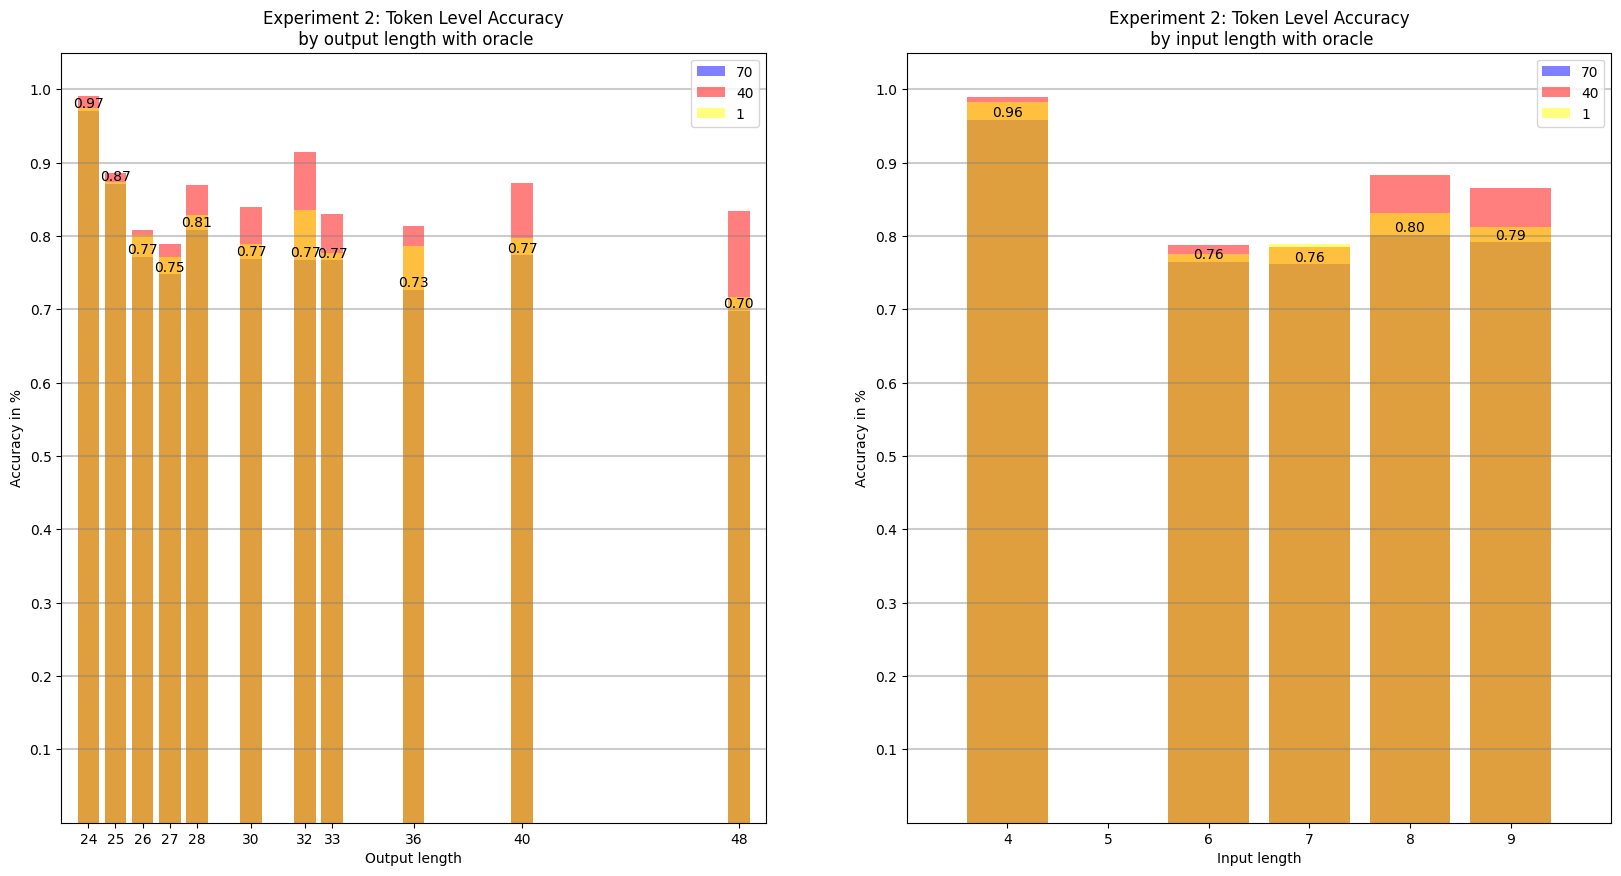

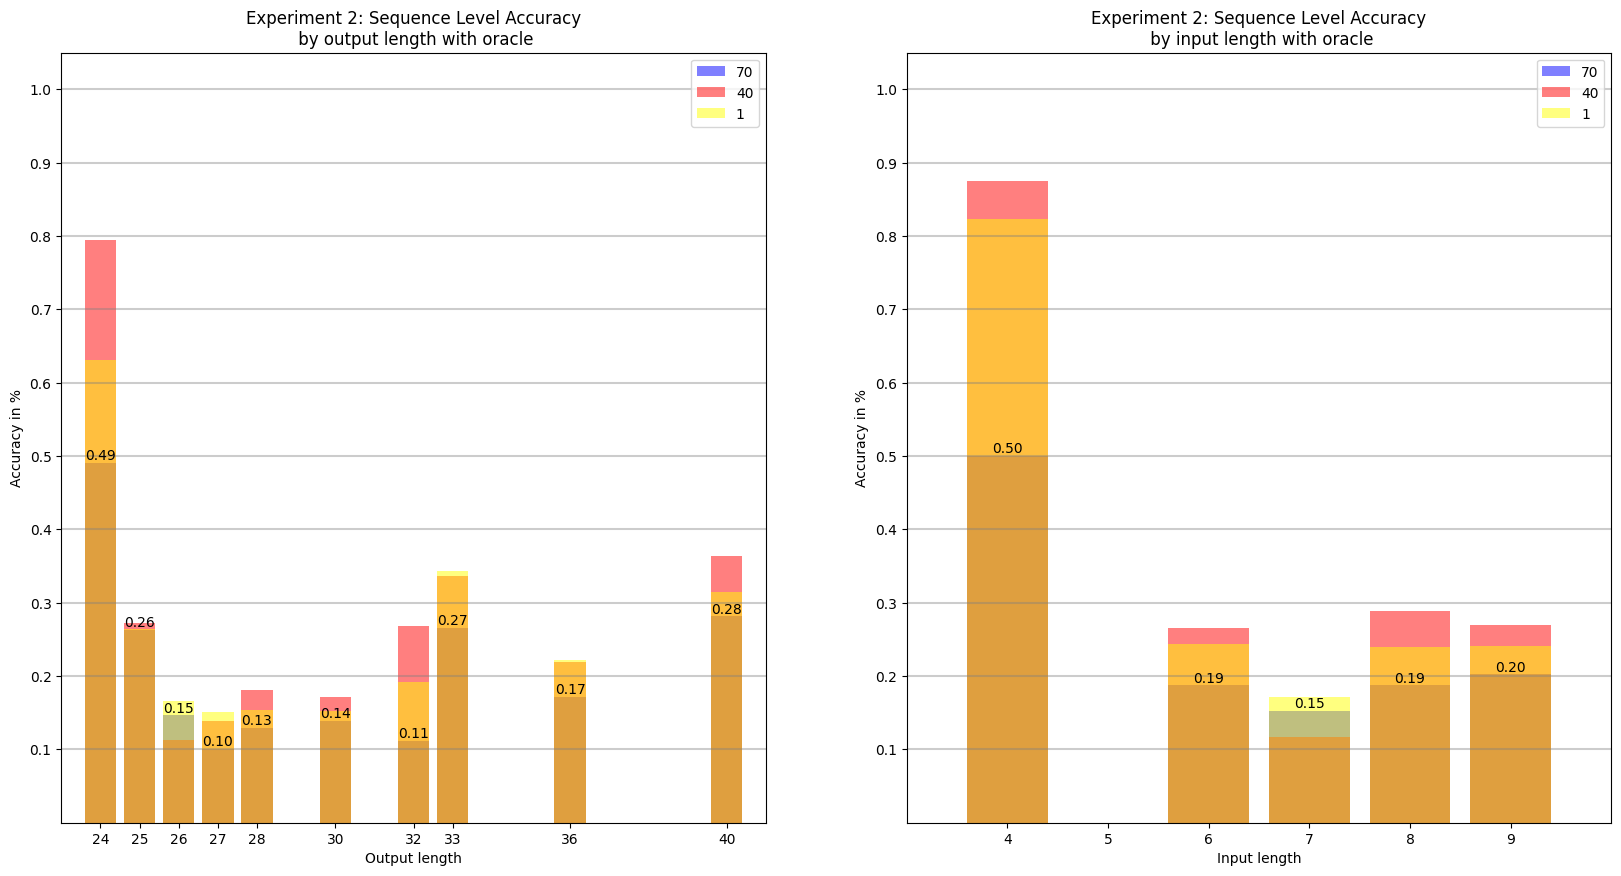

In [5]:
mk_e1_fig("group/saved_data_group/eval_results\E_1\E1.json")
mk_e2_fig_1("group/saved_data_group/eval_results\E_2\E2.json")
mk_e2_fig_2("group/saved_data_group/eval_results\E_2\E2.json")
mk_e2_fig_3("group/saved_data_group/eval_results\E_2\E2.json")
None

### Experiment 3


In [8]:
E3_3 = EvaluationResultContainer.from_json("group/saved_data_group/eval_results/E_3/E3_3.json")
E3_2 = EvaluationResultContainer.from_json("group/saved_data_group/eval_results/E_3/E3_2.json")
E3_1 = EvaluationResultContainer.from_json("group/saved_data_group/eval_results/E_3/E3_1.json")

TypeError: mk_bar_plt() got an unexpected keyword argument 'data'

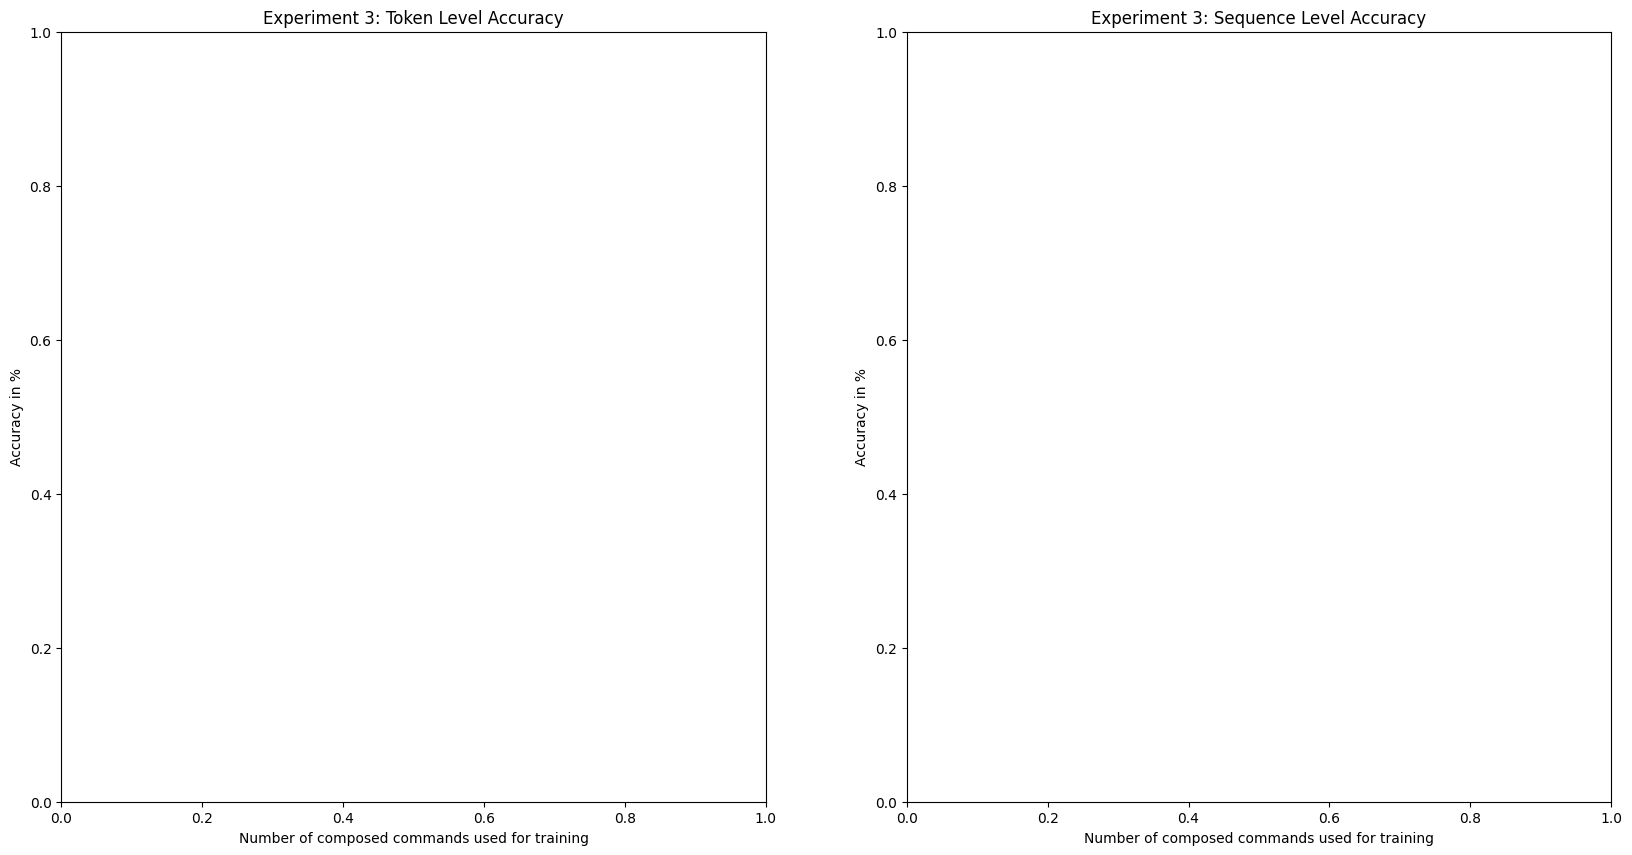

In [9]:
#SL ACC AVRG NO_ORACLE
acc_sl_avrg = MetricTemplate(flags=[
    Flags.LevelFlags.SL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])

E3_23_x_lbls = ['0','1','2','4','8','16','32']

f3_3, axs3 = plt.subplots(1, 2, figsize=(20, 10))
axs3[0].set_title("Experiment 3: Token Level Accuracy")
axs3[0].set_ylabel("Accuracy in %")
axs3[0].set_xlabel("Number of composed commands used for training")
axs3[1].set_title("Experiment 3: Sequence Level Accuracy")
axs3[1].set_ylabel("Accuracy in %")
axs3[1].set_xlabel("Number of composed commands used for training")


import numpy as np

# change this to choose epochs to show
epochs_to_show = [50,25,1]
colors = ["blue","red","yellow"]


for epoch_num,color in zip(epochs_to_show,colors):
    epoch_data_3_1 = E3_1.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_2 = E3_2.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_3 = E3_3.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_2 = np.mean(epoch_data_3_2, axis=0)
    epoch_data_3_3 = aggregate_by_exp_type(epoch_data_3_3)
    epoch_data_3_3.sort_by_exp_types()
    # split into sublists of 5 repetitions of each sub experiment
    sub_exprs:list[EvaluationResultContainer]= [epoch_data_3_3[i*5:(i+1)*5] for i in range(len(epoch_data_3_3)//5)]
    # avrg over repetitions
    epoch_data_3_3_avrg = EvaluationResultContainer(np.mean(sub_exprs, axis=1))*100
    epoch_data_3_2 = EvaluationResultContainer([epoch_data_3_2*100])
    epoch_data_3_2_tl = epoch_data_3_2.get_data(acc_tl_avrg)
    epoch_data_3_3_tl = epoch_data_3_3_avrg.get_data(acc_sl_avrg)
    epoch_data_3_23_tl = epoch_data_3_2_tl + epoch_data_3_3_tl

    epoch_data_3_2_sl = epoch_data_3_2.get_data(acc_sl_avrg)
    epoch_data_3_3_sl = epoch_data_3_3_avrg.get_data(acc_sl_avrg)
    epoch_data_3_23_sl = epoch_data_3_2_sl + epoch_data_3_3_sl

    turn_left_tl = epoch_data_3_1.get_data(acc_tl_avrg)[0].val*100
    turn_left_sl = epoch_data_3_1.get_data(acc_sl_avrg)[0].val*100

    alpha = 0.5
    if epoch_num != epochs_to_show[0]:
        # lowest epoch
        if epoch_num == epochs_to_show[-1]:
            alpha = 0.5
        mk_bar_plt(axs3[0],
                    data=epoch_data_3_23_tl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        mk_bar_plt(axs3[1],data=epoch_data_3_23_sl, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        axs3[0].scatter(x = -0.5, y = turn_left_tl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
        axs3[1].scatter(x = -0.5, y = turn_left_sl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
    else:
        # highest epoch
        mk_bar_plt(axs3[0],
                    data=epoch_data_3_23_tl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        # highest epoch
        mk_bar_plt(axs3[1],
                    data=epoch_data_3_23_sl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        axs3[0].scatter(x = -0.5, y = turn_left_tl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
        axs3[1].scatter(x = -0.5, y = turn_left_sl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)



axs3[0].legend()
axs3[1].legend()
axs3[0].legend(loc='lower left')
axs3[1].legend(loc='lower left')






